In [ ]:
import re
import nltk
import numpy
import string
import heapq

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
original = """A inteligência artificial é a inteligência similar à humana máquinas. 
                    Definem como o estudo de agente artificial com inteligência. 
                    Ciência e engenharia de produzir máquinas com inteligência. 
                    Resolver problemas e possuir inteligência. 
                    Relacionada ao comportamento inteligente. 
                    Construção de máquinas para raciocinar. 
                    Aprender com os erros e acertos. 
                    Inteligência artificial é raciocinar nas situações do cotidiano."""
original = re.sub(r'\s+', ' ', original)
original

'A inteligência artificial é a inteligência similar à humana máquinas. Definem como o estudo de agente artificial com inteligência. Ciência e engenharia de produzir máquinas com inteligência. Resolver problemas e possuir inteligência. Relacionada ao comportamento inteligente. Construção de máquinas para raciocinar. Aprender com os erros e acertos. Inteligência artificial é raciocinar nas situações do cotidiano.'

In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.append('ser')

In [ ]:
def prepross(texto):
  lowered = texto.lower()
  tokens = []
  for token in nltk.word_tokenize(lowered):
    tokens.append(token)

  tokens = [palavra for palavra in tokens if palavra not in stopwords and palavra not in string.punctuation]
  formatado = ' '.join([str(elemento) for elemento in tokens if not elemento.isdigit()])

  return formatado

In [ ]:
def notasent(sentencas, importantes, dist):
  notas = []
  id_sent = 0

  for sentenca in [nltk.word_tokenize(sentenca.lower()) for sentenca in sentencas]:
    
    id_p = []
    for palavra in importantes:
      if palavra in sentenca:
        id_p.append(sentenca.index(palavra))

    id_p.sort()

    if len(id_p) != 0:
      grupos = []
      grupo = [id_p[0]]
      i = 1
      while i < len(id_p):
        if (id_p[i] - id_p[i - 1]) < dist:
          grupo.append(id_p[i])
        else:
          grupos.append(grupo)
          grupo = [id_p[i]]
        i +=1
      grupos.append(grupo)

      maxnota = 0
      for g in grupos:
        impgrupo = len(g)
        total = g[-1] - g[0] + 1
        nota = 1.0 * impgrupo**2 / total

        if nota > maxnota:
          maxnota = nota

      notas.append((maxnota, id_sent))
      id_sent += 1
  return notas

In [ ]:
def sum(texto, n, dist, qt):
  originais = [sentenca for sentenca in nltk.sent_tokenize(texto)]
  formatadas = [prepross(original) for original in originais]
  palavras = [palavra for sentenca in formatadas for palavra in nltk.word_tokenize(sentenca)]
  freq = nltk.FreqDist(palavras)
  top = [palavra[0] for palavra in freq.most_common(n)]

  notas = notasent(formatadas, top, dist)
  melhores = heapq.nlargest(qt, notas)
  
  melhores = [originais[i] for (nota, i) in melhores]
  return originais, melhores, notas

In [ ]:
originais, melhores, notas = sum(original, 5, 3, 3)

In [ ]:
originais

['A inteligência artificial é a inteligência similar à humana máquinas.',
 'Definem como o estudo de agente artificial com inteligência.',
 'Ciência e engenharia de produzir máquinas com inteligência.',
 'Resolver problemas e possuir inteligência.',
 'Relacionada ao comportamento inteligente.',
 'Construção de máquinas para raciocinar.',
 'Aprender com os erros e acertos.',
 'Inteligência artificial é raciocinar nas situações do cotidiano.']

In [ ]:
melhores

['Construção de máquinas para raciocinar.',
 'A inteligência artificial é a inteligência similar à humana máquinas.',
 'Relacionada ao comportamento inteligente.']

In [ ]:
notas

[(2.6666666666666665, 0), (2.0, 1), (2.0, 2), (1.0, 3), (2.0, 4), (3.0, 5)]

In [ ]:
def resumo(titulo, sentencas, melhores):
  from IPython.core.display import HTML
  texto = ''

  display(HTML(f'<h1>Resumo - {titulo}</h1>'))
  for i in sentencas:
    if i in melhores:
      texto += str(i).replace(i, f"<mark>{i}</mark>")
    else:
      texto += i
  display(HTML(f" {texto} "))

In [ ]:
resumo('Teste', originais, melhores)

In [ ]:
!pip install goose3

In [ ]:
from goose3 import Goose

g = Goose()
url = 'https://iaexpert.academy/2020/11/09/ia-preve-resultado-das-eleicoes-americanas/'
artigo = g.extract(url)

In [ ]:
artigo.cleaned_text

'Nas eleições presidenciais americanas de 2016, a maioria das predições apontavam para a vitória de Hillary Clinton. Entretanto, a história nos mostrou o resultado oposto, e Donald Trump foi o presidente nos últimos 4 anos. Desta vez, os estatísticos reexaminaram seus modelos, para aumentar o grau de confiabilidade nos seus resultados. Nesta tentativa de otimização das predições, a inteligência artificial certamente não ficou de fora.\n\nO modelo desenvolvido pelo Dr. Hernan Makse, físico estatístico da Universidade da Cidade de Nova York, baseou suas predições em uma rede neural treinada para processar os sentimentos expressos nas redes sociais. O algoritmo fez a análise de cerca de 1 bilhão de tweets para chegar a uma estimativa dos resultados do pleito. No dia da eleição, 3 de novembro, o modelo estava indicando a vitória de Joe Biden.\n\nO Dr. Makse disse que seu trabalho começou já na eleição de 2016, e foi testado novamente nas eleições na Argentina ano passado. Desta vez, o mode

In [ ]:
originais, melhores, notas = sum(artigo.cleaned_text, 100, 5, 5)

In [ ]:
notas

[(9.0, 0),
 (10.0, 1),
 (9.0, 2),
 (8.0, 3),
 (21.0, 4),
 (10.0, 5),
 (8.0, 6),
 (12.0, 7),
 (10.0, 8),
 (13.0, 9),
 (3.2, 10),
 (4.764705882352941, 11),
 (3.272727272727273, 12),
 (4.9, 13),
 (1.0, 14),
 (1.5, 15),
 (3.2666666666666666, 16),
 (1.3333333333333333, 17),
 (2.6666666666666665, 18)]

In [ ]:
resumo(artigo.title, originais, melhores)

In [ ]:
!pip install feedparser

In [ ]:
import feedparser
from bs4 import BeautifulSoup
import os
import json

In [ ]:
url = 'http://iaexpert.academy/feed'
feed = feedparser.parse(url)

In [ ]:
for e in feed.entries:
  print(e.title)
  print(e.links[0].href)
  print(e.content[0].value)

In [ ]:
def clean(texto):
  if texto == '':
    return ''
  return BeautifulSoup(texto, 'html5lib').get_text()

In [ ]:
clean(e.content[0].value)

'A tarefa de reconhecer e extrair texto de imagens por vias artificiais, chamada de reconhecimento ótico de caracteres (OCR, optical character recognition), teve um início bastante prematuro considerando outras tarefas automatizadas. Já em 1914, Emanuel Goldberg desenvolveu um máquina capaz de ler caracteres e convertê-los em código telegráfico padrão. Tanto tempo de desenvolvimento pode nos levar a pensar que esta tarefa já está solucionada, mas não é o caso. Atualmente, os métodos de extração são desafiados com imagens cada vez mais complexas, o que exige novas abordagens e tecnologias.\n\n\n\nO OCR pode ser descrito como a conversão de imagens contendo texto digitado, escrito a mão ou impresso, em caracteres que uma máquina é capaz de entender. A imagem em questão pode ser um documento escaneado ou fotografado, onde o texto é o principal objeto de interesse, ou imagens menos direcionadas, como uma fotografia de um cenário onde aparecem placas e fachadas. \n\n\n\nAs primeiras versões

In [ ]:
artigos = []
for e in feed.entries:
  artigos.append({'titulo': e.title, 'conteudo': clean(e.content[0].value)})

In [ ]:
artigos

[{'conteudo': 'As pesquisas científicas sobre interfaces cérebro-computador (BCI, brain-computer interfaces) estão em ritmo acelerado. Uma das possibilidades que esta abordagem confere é a capacidade de restaurar a comunicação para pessoas que perderam a habilidade de se mover ou de falar, através da interpretação dos sinais do cérebro por computadores para produzir texto. Até então, a maioria dos avanços na área envolveu permitir que uma pessoa digitasse em um teclado virtual controlando o ponteiro do mouse, o que tem claras limitações de velocidade. Agora, uma nova pesquisa publicada por cientistas da Universidade de Stanford dá um passo importante no sentido de implementar um sistema do tipo BCI com potencial aplicação prática. Os pesquisadores usaram inteligência artificial para decodificar os sinais cerebrais diretamente em letras.\n\n\n\nA ideia da pesquisa veio do conhecimento de que mesmo uma década depois de perder os movimentos finos como aqueles associados à escrita, o céreb

In [ ]:
salvar = os.path.join('feed_iaexpert.json')
arquivo = open(salvar, 'w+')
arquivo.write(json.dumps(artigos, indent=1))
arquivo.close()

In [ ]:
artigos = json.loads(open('/content/feed_iaexpert.json').read())
artigos

[{'conteudo': 'As pesquisas científicas sobre interfaces cérebro-computador (BCI, brain-computer interfaces) estão em ritmo acelerado. Uma das possibilidades que esta abordagem confere é a capacidade de restaurar a comunicação para pessoas que perderam a habilidade de se mover ou de falar, através da interpretação dos sinais do cérebro por computadores para produzir texto. Até então, a maioria dos avanços na área envolveu permitir que uma pessoa digitasse em um teclado virtual controlando o ponteiro do mouse, o que tem claras limitações de velocidade. Agora, uma nova pesquisa publicada por cientistas da Universidade de Stanford dá um passo importante no sentido de implementar um sistema do tipo BCI com potencial aplicação prática. Os pesquisadores usaram inteligência artificial para decodificar os sinais cerebrais diretamente em letras.\n\n\n\nA ideia da pesquisa veio do conhecimento de que mesmo uma década depois de perder os movimentos finos como aqueles associados à escrita, o céreb

In [ ]:
feed = ''
for artigo in artigos:
  feed += artigo['conteudo']

In [ ]:
feed

'As pesquisas científicas sobre interfaces cérebro-computador (BCI, brain-computer interfaces) estão em ritmo acelerado. Uma das possibilidades que esta abordagem confere é a capacidade de restaurar a comunicação para pessoas que perderam a habilidade de se mover ou de falar, através da interpretação dos sinais do cérebro por computadores para produzir texto. Até então, a maioria dos avanços na área envolveu permitir que uma pessoa digitasse em um teclado virtual controlando o ponteiro do mouse, o que tem claras limitações de velocidade. Agora, uma nova pesquisa publicada por cientistas da Universidade de Stanford dá um passo importante no sentido de implementar um sistema do tipo BCI com potencial aplicação prática. Os pesquisadores usaram inteligência artificial para decodificar os sinais cerebrais diretamente em letras.\n\n\n\nA ideia da pesquisa veio do conhecimento de que mesmo uma década depois de perder os movimentos finos como aqueles associados à escrita, o cérebro ainda manté

In [ ]:
feed_formatado = prepross(feed)
feed_formatado

'pesquisas científicas sobre interfaces cérebro-computador bci brain-computer interfaces ritmo acelerado possibilidades abordagem confere capacidade restaurar comunicação pessoas perderam habilidade mover falar através interpretação sinais cérebro computadores produzir texto então maioria avanços área envolveu permitir pessoa digitasse teclado virtual controlando ponteiro mouse claras limitações velocidade agora nova pesquisa publicada cientistas universidade stanford dá passo importante sentido implementar sistema tipo bci potencial aplicação prática pesquisadores usaram inteligência artificial decodificar sinais cerebrais diretamente letras ideia pesquisa veio conhecimento década perder movimentos finos associados escrita cérebro ainda mantém capacidade orquestrá-los além disso cada letra exige conjunto específico movimentos velocidade variável trajetórias curvas especificidade reflete cérebro ativação regiões bem distintas vez fácil identificar classificar usando machine learning co

In [ ]:
len(feed), len(feed_formatado)

(21230, 16006)

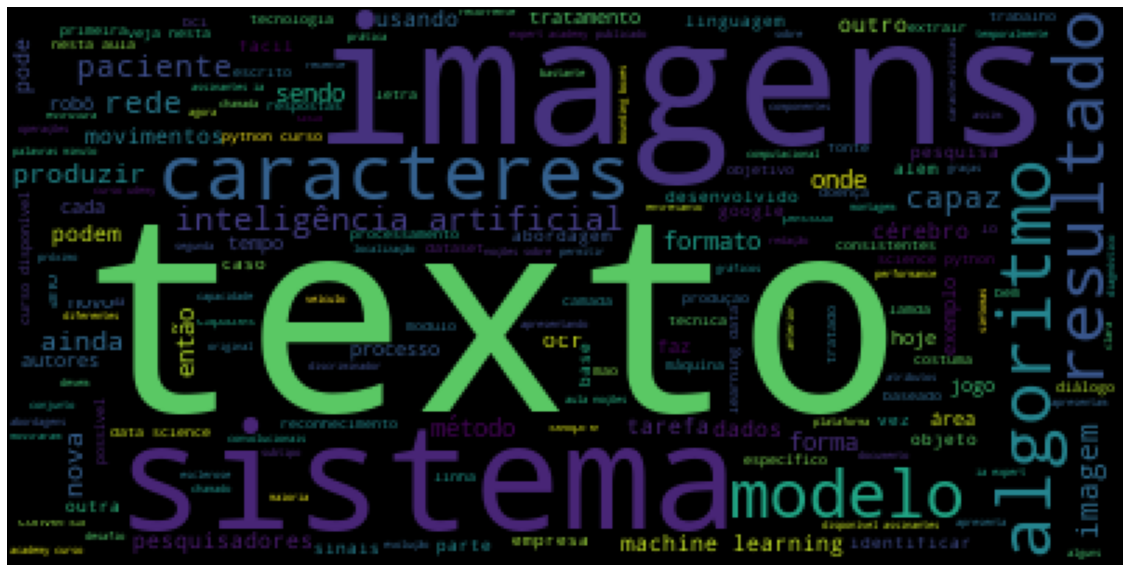

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(feed_formatado))

In [ ]:
import spacy
!python -m spacy download pt

In [ ]:
pln = spacy.load('pt')
pln

In [ ]:
documento = pln(feed_formatado)

In [ ]:
from spacy import displacy
displacy.render(documento, style = 'ent', jupyter = True)

In [ ]:
for entidade in documento.ents:
  if entidade.label_ == 'ORG':
    print(entidade.text, entidade.label_)

universidade stanford ORG
machine learning ORG
google ORG
google ORG
machine learning ORG
sony microsoft ORG
intel ORG
nissan ORG
machine learning ORG
universidade college london ORG
machine learning ORG
machine learning ORG
google ORG
deep learning ORG


In [ ]:
for artigo in artigos:
  originais, melhores, _ = sum(artigo['conteudo'], 150, 10, 5)
  resumo(artigo['titulo'], originais, melhores)
  

In [ ]:
def salva_resumo(titulo, sentencas, melhores):
  HTML_TEMPLATE = """<html>
    <head>
      <title>{0}</title>
      <meta http-equiv="Content-Type" content="text/html; charset=UTL-8" />
    </head>
    <body>{1}</body>
  </html>"""

  texto = ''
  for i in sentencas:
    if i in melhores:
      texto += str(i).replace(i, f'<mark>{i}</mark>')
    else:
      texto += i
  arquivo = open(os.path.join(titulo + '.html'), 'wb')
  html = HTML_TEMPLATE.format(titulo + ' - resumo', texto)
  arquivo.write(html.encode('utf-8'))
  arquivo.close()

In [ ]:
for artigo in artigos:
  originais, melhores, _ = sum(artigo['conteudo'], 150, 10, 5)
  salva_resumo(artigo['titulo'], originais, melhores)

In [ ]:
def preprosslem(texto):
  lowered = texto.lower()
  texto = re.sub(r' +', ' ', texto)

  doc = pln(texto)
  tokens = []
  for token in doc:
    tokens.append(token.lemma_)

  tokens = [palavra for palavra in tokens if palavra not in stopwords and palavra not in string.punctuation]
  formatado = ' '.join([str(elemento) for elemento in tokens if not elemento.isdigit()])

  return formatado

In [ ]:
def sumlem(texto, n, dist, qt):
  originais = [sentenca for sentenca in nltk.sent_tokenize(texto)]
  formatadas = [preprosslem(original) for original in originais]
  palavras = [palavra for sentenca in formatadas for palavra in nltk.word_tokenize(sentenca)]
  freq = nltk.FreqDist(palavras)
  top = [palavra[0] for palavra in freq.most_common(n)]

  notas = notasent(formatadas, top, dist)
  melhores = heapq.nlargest(qt, notas)
  
  melhores = [originais[i] for (nota, i) in melhores]
  return originais, melhores, notas

In [ ]:
artigos[0]['conteudo']

'As pesquisas científicas sobre interfaces cérebro-computador (BCI, brain-computer interfaces) estão em ritmo acelerado. Uma das possibilidades que esta abordagem confere é a capacidade de restaurar a comunicação para pessoas que perderam a habilidade de se mover ou de falar, através da interpretação dos sinais do cérebro por computadores para produzir texto. Até então, a maioria dos avanços na área envolveu permitir que uma pessoa digitasse em um teclado virtual controlando o ponteiro do mouse, o que tem claras limitações de velocidade. Agora, uma nova pesquisa publicada por cientistas da Universidade de Stanford dá um passo importante no sentido de implementar um sistema do tipo BCI com potencial aplicação prática. Os pesquisadores usaram inteligência artificial para decodificar os sinais cerebrais diretamente em letras.\n\n\n\nA ideia da pesquisa veio do conhecimento de que mesmo uma década depois de perder os movimentos finos como aqueles associados à escrita, o cérebro ainda manté

In [ ]:
originais, melhores, _ = sumlem(artigos[0]['conteudo'], 300, 5, 5)
resumo(artigos[0]['titulo'], originais, melhores)